In [19]:
import pandas as pd
import numpy as np

In [20]:
#读取entity.tsv
entity = pd.read_csv('../work_data/entity.tsv', sep='\t', header=None)
entity.columns = ['pmid', 'start', 'end', 'entity', 'annotation', 'text']
entity.head()

,pmid,start,end,entity,annotation,text
0,37796141,64,72,patients,Species,9606
1,37796141,116,124,COVID-19,Disease,MESH:C000657245
2,37796141,337,339,PD,Disease,MESH:D010300
3,37796141,341,349,patients,Species,9606
4,37796141,362,370,COVID-19,Disease,MESH:C000657245


In [21]:
import re

# Open the file and read each line
with open('../work_data/abstract.txt', 'r') as f:
    lines = f.readlines()

# Define the regular expression pattern to match the pmid, title, and abstract
pattern = r'^(\d+)\|(t|a)\|(.+)$'

# Initialize a dictionary to store the pmid, title, and abstract for each article
articles = {}

# Loop through each line and extract the pmid, title, and abstract
for line in lines:
    match = re.match(pattern, line)
    if match:
        pmid = match.group(1)
        section = match.group(2)
        text = match.group(3)
        if pmid not in articles:
            articles[pmid] = {}
        if section == 't':
            articles[pmid]['title'] = text
        elif section == 'a':
            articles[pmid]['abstract'] = text
            
#展示
list(articles.items())[:2]

[('37796141',
  {'title': 'Current status of exercise and its impact on quality of life in patients undergoing peritoneal dialysis in the post-COVID-19 period.',
   'abstract': 'OBJECTIVES: The aims of this study were to investigate the current status and the influence factors of exercise, and to explore the impact of exercise on the quality of life (QoL) in peritoneal dialysis (PD) patients in the post-COVID-19 period. MATERIALS AND METHODS: Those PD patients who were followed up between September 2020 and August 2021 were enrolled. The collected data included demographic information, clinical data, exercise data, and QoL. RESULTS: In total, 339 PD patients were included in this cross-sectional study. The mean age was 44.0 +- 13.0 years, with a median PD duration of 6.7 (1.7 - 41.9) months. The primary renal disease was glomerulonephritis (68.4%). 277 (81.7%) PD patients performed exercise, with median exercise time 5.0 (3.5 - 7.8) hours per week. The main type of exercise was slow wa

In [22]:
#提取出annotation列中含有Mutation的行
entity = entity[entity['annotation'].str.contains('Mutation')].copy()
entity.head()

,pmid,start,end,entity,annotation,text
4299,37722481,674,679,K129R,ProteinMutation,tmVar:p|SUB|K|129|R;HGVS:p.K129R;VariantGroup:3
4300,37722481,681,686,V722I,ProteinMutation,tmVar:p|SUB|V|722|I;HGVS:p.V722I;VariantGroup:5
4301,37722481,691,696,V987F,ProteinMutation,tmVar:p|SUB|V|987|F;HGVS:p.V987F;VariantGroup:4
4302,37722481,826,831,E340K,ProteinMutation,tmVar:p|SUB|E|340|K;HGVS:p.E340K;VariantGroup:6
4303,37722481,833,838,K356R,ProteinMutation,tmVar:p|SUB|K|356|R;HGVS:p.K356R;VariantGroup:0


In [23]:
#提取出对应pmid编号去重
pmid_list = entity['pmid'].unique().tolist()
len(pmid_list)

21

In [24]:
pmid_list[1]


37511668

In [25]:
articles['37511668']

{'title': 'Persistent Symptoms and IFN-gamma-Mediated Pathways after COVID-19.',
 'abstract': "After COVID-19, patients have reported various complaints such as fatigue, neurological symptoms, and insomnia. Immune-mediated changes in amino acid metabolism might contribute to the development of these symptoms. Patients who had had acute, PCR-confirmed COVID-19 infection about 60 days earlier were recruited within the scope of the prospective CovILD study. We determined the inflammatory parameters and alterations in tryptophan and phenylalanine metabolism in 142 patients cross-sectionally. Symptom persistence (pain, gastrointestinal symptoms, anosmia, sleep disturbance, and neurological symptoms) and patients' physical levels of functioning were recorded. Symptoms improved in many patients after acute COVID-19 (n = 73, 51.4%). Still, a high percentage of patients had complaints, and women were affected more often. In many patients, ongoing immune activation (as indicated by high neopteri

In [26]:
#将pmid_list中所有元素转换成含有双引号的字符串
pmid_list = [str(pmid) for pmid in pmid_list]
pmid_list[1]
articles[pmid_list[1]]

{'title': 'Persistent Symptoms and IFN-gamma-Mediated Pathways after COVID-19.',
 'abstract': "After COVID-19, patients have reported various complaints such as fatigue, neurological symptoms, and insomnia. Immune-mediated changes in amino acid metabolism might contribute to the development of these symptoms. Patients who had had acute, PCR-confirmed COVID-19 infection about 60 days earlier were recruited within the scope of the prospective CovILD study. We determined the inflammatory parameters and alterations in tryptophan and phenylalanine metabolism in 142 patients cross-sectionally. Symptom persistence (pain, gastrointestinal symptoms, anosmia, sleep disturbance, and neurological symptoms) and patients' physical levels of functioning were recorded. Symptoms improved in many patients after acute COVID-19 (n = 73, 51.4%). Still, a high percentage of patients had complaints, and women were affected more often. In many patients, ongoing immune activation (as indicated by high neopteri

In [27]:
#根据pmid_list提取出对应的title和abstract
mutation_abstract = []
mutation_title = []
for pmid in pmid_list:
    if pmid in articles:
        if 'abstract' in articles[pmid]:
            mutation_abstract.append(articles[pmid]['abstract'])
        else:
            mutation_abstract.append('')
        if 'title' in articles[pmid]:
            mutation_title.append(articles[pmid]['title'])
        else:
            mutation_title.append('')
    else:
        mutation_abstract.append('')
        mutation_title.append('')
#展示
print (mutation_title[1])
print (mutation_abstract[1])

Persistent Symptoms and IFN-gamma-Mediated Pathways after COVID-19.
After COVID-19, patients have reported various complaints such as fatigue, neurological symptoms, and insomnia. Immune-mediated changes in amino acid metabolism might contribute to the development of these symptoms. Patients who had had acute, PCR-confirmed COVID-19 infection about 60 days earlier were recruited within the scope of the prospective CovILD study. We determined the inflammatory parameters and alterations in tryptophan and phenylalanine metabolism in 142 patients cross-sectionally. Symptom persistence (pain, gastrointestinal symptoms, anosmia, sleep disturbance, and neurological symptoms) and patients' physical levels of functioning were recorded. Symptoms improved in many patients after acute COVID-19 (n = 73, 51.4%). Still, a high percentage of patients had complaints, and women were affected more often. In many patients, ongoing immune activation (as indicated by high neopterin and CRP concentrations) a

上述是从主题关于long covid的文献中筛选出含有Mutation实体的文献标题和摘要

In [28]:
mutation_abstract[1]

"After COVID-19, patients have reported various complaints such as fatigue, neurological symptoms, and insomnia. Immune-mediated changes in amino acid metabolism might contribute to the development of these symptoms. Patients who had had acute, PCR-confirmed COVID-19 infection about 60 days earlier were recruited within the scope of the prospective CovILD study. We determined the inflammatory parameters and alterations in tryptophan and phenylalanine metabolism in 142 patients cross-sectionally. Symptom persistence (pain, gastrointestinal symptoms, anosmia, sleep disturbance, and neurological symptoms) and patients' physical levels of functioning were recorded. Symptoms improved in many patients after acute COVID-19 (n = 73, 51.4%). Still, a high percentage of patients had complaints, and women were affected more often. In many patients, ongoing immune activation (as indicated by high neopterin and CRP concentrations) and enhanced tryptophan catabolism were found. A higher phenylalanin

In [29]:
mutation_abstract[2]

'With the goal to increase knowledge on the healthcare impact of the post-COVID-19 condition we exploited the administrative claims database of Lombardy, the largest Italian region and the first after China to be heavily hit by the SARS-CoV-2 pandemic in February-May 2020. We chose to employ the dispensation of drugs and diagnostic tests as proxies of the impact of the post-COVID condition in 46,574 cases who recovered from COVID-19 and were negative at PCR testing within June 20, 2020. Data were obtained throughout the 18-month post-negativization period until December 2021 and results on the use of drugs and diagnostic tests were compared with those accrued in the same cases during the pre-COVID period in July-December 2019. After an increase in the first semester after SARS-CoV-2 negativization (July-December 2020), trends in the dispensation of drugs according to the broad ATC classes and of diagnostic tests decreased or remained substantially stable. However, dispensation of drugs

In [30]:
mutation_abstract

['We present the clinical course of a 72-year-old female with COVID-19 and a past history of hematological stem cell transplantation for acute myeloid leukemia. We performed serial analyses of viral load and whole-genome amplification. The virus growth was evaluated by a real-time PCR assay. Neutralizing activity was measured using a chemiluminescence reduction neutralizing test of SARS-CoV-2 pseudotyped virus. After neutralizing antibody therapy, the Ct value of viral genome was 28. Viruses was no longer isolated in a cell culture. K129R, V722I and V987F of amino acid mutation in spike protein region were identified, although they soon disappeared. Four months after symptom onset, E340K, K356R, R346T and E484V mutations appeared and persisted. The viability of the virus decreased over time, with the virus at day 145 having a Ct value of 24 and positive virus isolation, but at a slower growth rate. Neutralizing antibody activity for Omicron BA.5 finally appeared about 4 months after in

In [31]:
#将mutation_abstract所有元素合并成一段话
mutation_abstract = ' '.join(mutation_abstract)
mutation_abstract

'We present the clinical course of a 72-year-old female with COVID-19 and a past history of hematological stem cell transplantation for acute myeloid leukemia. We performed serial analyses of viral load and whole-genome amplification. The virus growth was evaluated by a real-time PCR assay. Neutralizing activity was measured using a chemiluminescence reduction neutralizing test of SARS-CoV-2 pseudotyped virus. After neutralizing antibody therapy, the Ct value of viral genome was 28. Viruses was no longer isolated in a cell culture. K129R, V722I and V987F of amino acid mutation in spike protein region were identified, although they soon disappeared. Four months after symptom onset, E340K, K356R, R346T and E484V mutations appeared and persisted. The viability of the virus decreased over time, with the virus at day 145 having a Ct value of 24 and positive virus isolation, but at a slower growth rate. Neutralizing antibody activity for Omicron BA.5 finally appeared about 4 months after inf

In [32]:
type(mutation_abstract)

str

针对提取出来的DNAMutation文本尝试词云可视化

In [33]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [34]:
from nltk.tokenize import word_tokenize    #分词包

In [ ]:
nltk.download('punkt')

In [35]:
text = mutation_abstract

In [36]:
tokens = word_tokenize(text)
tokens = [token.lower() for token in tokens]
#tokens[:10]

In [ ]:
nltk.download('stopwords')

In [37]:
from nltk.corpus import stopwords # 导入停用词包
stopwords.readme().replace('\n', ' ')

'Stopwords Corpus  This corpus contains lists of stop words for several languages.  These are high-frequency grammatical words which are usually ignored in text retrieval applications.  They were obtained from: http://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/  The stop words for the Romanian language were obtained from: http://arlc.ro/resources/  The English list has been augmented https://github.com/nltk/nltk_data/issues/22  The German list has been corrected https://github.com/nltk/nltk_data/pull/49  A Kazakh list has been added https://github.com/nltk/nltk_data/pull/52  A Nepali list has been added https://github.com/nltk/nltk_data/pull/83  An Azerbaijani list has been added https://github.com/nltk/nltk_data/pull/100  A Greek list has been added https://github.com/nltk/nltk_data/pull/103  An Indonesian list has been added https://github.com/nltk/nltk_data/pull/112 '

In [38]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [39]:
stopwords.raw('english').replace('\n',' ')

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't "

In [40]:
print(len(tokens))
tokens2 = [token for token in tokens if token not in stopwords.words('english')]
print(len(tokens2))

5236
3720


In [41]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
print(len(tokens2))
tokens3 = [token for token in tokens2 if token not in punctuation]
print(len(tokens3))

3720
3027


In [43]:
pip install wordcloud

     ---------------------------------------- 0.0/152.1 kB ? eta -:--:--
     ------- ------------------------------- 30.7/152.1 kB 1.3 MB/s eta 0:00:01
     -------------- ---------------------- 61.4/152.1 kB 544.7 kB/s eta 0:00:01
     ---------------------- -------------- 92.2/152.1 kB 655.4 kB/s eta 0:00:01
     ----------------------------- ------ 122.9/152.1 kB 654.9 kB/s eta 0:00:01
     ------------------------------------ 152.1/152.1 kB 698.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [45]:
word_cloud = WordCloud(background_color="white") # 词云图的背景颜色) 
word_cloud.generate(" ".join(tokens3))

(-0.5, 399.5, 199.5, -0.5)

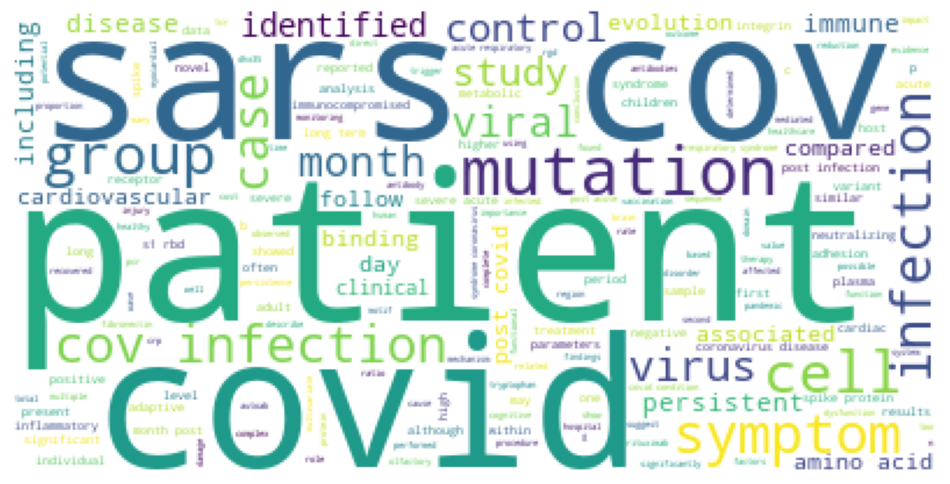

In [46]:
plt.subplots(figsize=(12,8))
plt.imshow(word_cloud)
plt.axis("off")

前一步kegg富集分析中，有一个突变基因和covid-19富集集合重叠，gene = "7099",针对这一篇文献分析

In [47]:
print(entity)

            pmid  start   end                     entity       annotation  \
4299    37722481    674   679                      K129R  ProteinMutation   
4300    37722481    681   686                      V722I  ProteinMutation   
4301    37722481    691   696                      V987F  ProteinMutation   
4302    37722481    826   831                      E340K  ProteinMutation   
4303    37722481    833   838                      K356R  ProteinMutation   
4304    37722481    840   845                      R346T  ProteinMutation   
4305    37722481    850   855                      E484V  ProteinMutation   
13533   37511668   1055  1080  phenylalanine to tyrosine  ProteinMutation   
46021   36944811   1218  1222                       N05A  ProteinMutation   
46022   36944811   1242  1246                       N06A  ProteinMutation   
46200   36943439     95    99                       D614  ProteinMutation   
46211   36943439    796   801                      D614G  ProteinMutation   

In [55]:
entity = pd.read_csv('../work_data/entity.tsv', sep='\t', header=None)
entity.columns = ['pmid', 'start', 'end', 'entity', 'annotation', 'text']

In [56]:
gene = ['TLR4', 'ARMD10', 'CD284', 'TLR-4', 'TOLL']
entity_gene = entity[entity['entity'].isin(gene)].copy()
print(entity_gene)

            pmid  start   end entity annotation   text
893     37777557    420   424   TLR4       Gene   7099
15562   37477768    938   942   TLR4       Gene   7099
50807   36857178     33    37   TLR4       Gene  21898
50826   36857178    908   912   TLR4       Gene  21898
50831   36857178   1115  1119   TLR4       Gene   7099
50834   36857178   1207  1211   TLR4       Gene   7099
56071   36769320   1152  1156   TLR4       Gene   7099
94240   36137317   1018  1022   TLR4       Gene   7099
163151  34915155    981   985   TLR4       Gene   7099
163154  34915155   1215  1219   TLR4       Gene   7099
200842  34281186    610   614   TLR4       Gene   7099
200858  34281186   1478  1482   TLR4       Gene   7099
200864  34281186   1668  1672   TLR4       Gene   7099
202301  34258628     24    28   TLR4       Gene   7099
202314  34258628    820   824   TLR4       Gene   7099
209409  34131597    957   961   TLR4       Gene   7099


In [57]:
mutation_pmid_id = entity[entity.iloc[:, 4] == "DNAMutation"].iloc[:, 0].unique()
entity_pmid = entity[entity.iloc[:, 0].isin(mutation_pmid_id)].copy()

In [60]:
print(mutation_pmid_id)

[36857178 35639041 35384599 34387618 33299899]


In [58]:
entity_gene = entity_pmid[entity_pmid['entity'].isin(gene)].copy()

In [59]:
print(entity_gene)

           pmid  start   end entity annotation   text
50807  36857178     33    37   TLR4       Gene  21898
50826  36857178    908   912   TLR4       Gene  21898
50831  36857178   1115  1119   TLR4       Gene   7099
50834  36857178   1207  1211   TLR4       Gene   7099


由此可见pmid=36857178的文献中，确实有关于7099基因的突变，但是这个突变和covid-19的关系不明确

In [64]:
#提取出pmid=36857178的行
entity_TLR4 = entity[entity['pmid'] == 36857178].copy()

In [65]:
print(entity_TLR4)

           pmid  start   end                                           entity  \
50805  36857178      0    10                                       SARS-CoV-2   
50806  36857178     11    16                                            Spike   
50807  36857178     33    37                                             TLR4   
50808  36857178     57    78                            cognitive dysfunction   
50809  36857178     99   116                                COVID-19 syndrome   
50810  36857178    120   124                                             mice   
50811  36857178    126   147                            Cognitive dysfunction   
50812  36857178    169   177                                         patients   
50813  36857178    188   212                         coronavirus disease 2019   
50814  36857178    214   222                                         COVID-19   
50815  36857178    318   365  severe acute respiratory syndrome coronavirus 2   
50816  36857178    367   377